In [ ]:
import numpy as np
# !pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns

In [76]:
# !pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [77]:

df=pd.read_csv("C:/Users/N/Desktop/Fall 2024/Machine Learning CS 438/Project/combined_articles_final.csv")
print(df.head())
print(df.shape)


   id                                              title  \
0   0  ہم لکھنے والے ایک بے ایمان معاشرہ میں سانس لے ...   
1   1                          ’’کیا اُدھر باغ بھی ہے؟‘‘   
2   2               کچھ زخمی کہہ رہے تھے کہ وہ زندہ ہیں…   
3   3               آگرے والا عبدالکریم اور ملکہ وکٹوریہ   
4   4                                "چچی سیدانی تھیں….”   

                                                link  \
0  https://urdu.arynews.tv/intezar-hussain-urdu-w...   
1   https://urdu.arynews.tv/lakhnau-nawab-mahalsara/   
2  https://urdu.arynews.tv/politics-and-politicia...   
3  https://urdu.arynews.tv/munshi-abdul-karim-and...   
4        https://urdu.arynews.tv/aslam-parvez-khaka/   

                                             content     gold_label  
0  سوچتا ہوں غالب س کتن مختلف زمان جی رہ ہیں شخص ...  entertainment  
1  محمد حسین آزاد ن میر ک بار واقعہ لکھا ہ انھوں...  entertainment  
2  وطنِ عزیز سیاست دار و مدار رہ ہ جماعت ن کتنا ب...  entertainment  
3  پیار شوہر البرٹ ب ح

In [ ]:
stopwords = {
    'اور', 'ایک', 'کو', 'ہے', 'میں', 'کی', 'سے', 'پر', 'ہو', 'یہ', 'کا', 'اس', 'کہ', 'کر', 'تھا', 'تھی', 'تھے', 
    'لیے', 'بھی', 'نے', 'جو', 'ہوا', 'وہ', 'کیا', 'جا', 'نہ', 'تو', 'یا', 'کرنے', 'گیا', 'کر', 'دیا', 
    'لیکن', 'بہت', 'آپ', 'ہم', 'سب', 'کچھ', 'اپنے', 'ان', 'کردی', 'اگر', 'ہوتی', 'اب', 'مجھے', 'اسی', 'جس', 'اسے', 
    'اپنی', 'کسی', 'ہوتا', 'انہوں', 'تھیں', 'کہا', 'جب', 'اُس', 'کل', 'کوئی', 'ہوتے', 'تم', 'کس', 'رہا', 'کن', 'ایسے', 
    'جاتا', 'اسی', 'اُن', 'رہے', 'گئے', 'جاتی', 'تھے', 'اُنہوں', 'اُسی', 'بنی', 'بعد', 'چاہیے', 'بین', 'پھر', 'اُنکا', 'ہونے'
}
def preprocess_text(text, stopwords_list):
    tokens = text.lower().split()  
    tokens = [token for token in tokens if token.isalnum()] 
    return ' '.join([token for token in tokens if token not in stopwords_list])


df['processed_content'] = df['content'].apply(lambda x: preprocess_text(x, stopwords))
df['processed_content'].head()



0    سوچتا ہوں غالب س کتن مختلف زمان جی رہ ہیں شخص ...
1    محمد حسین ن میر ک بار واقعہ لکھا ہ انھوں ن اپن...
2    عزیز سیاست دار و مدار رہ ہ جماعت ن کتنا بڑا جل...
3    پیار شوہر البرٹ ب حد عزیز ملازم جان بران ک مرن...
4    خاکہ نگاری اردو مقبول صنف رہی ہ زیادہ تر قلم ن...
Name: processed_content, dtype: object

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(df['processed_content'], 
    df['gold_label'], test_size=0.2, random_state=42)
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)


(1189,)
(298,)
(1189,)
(298,)


In [80]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

class BagOfWords:
    def __init__(self):
        self.vocabulary_ = {}
        self.vocabulary_size_ = 0

    def fit(self, corpus):
        """Build a vocabulary from the provided corpus"""
        word_counts = Counter(word for sentence in corpus for word in sentence.split())
        self.vocabulary_ = {word: idx for idx, word in enumerate(word_counts)}
        self.vocabulary_size_ = len(self.vocabulary_)
    
    def vectorize(self, sentence):
        """Convert a sentence into a bag-of-words vector"""
        words = sentence.split()
        vector = np.zeros(self.vocabulary_size_, dtype=int)
        for word in words:
            if word in self.vocabulary_:
                index = self.vocabulary_[word]
                vector[index] += 1
        return vector

bow = BagOfWords()
bow.fit(train_data)

X_train_vectors = np.array([bow.vectorize(text) for text in train_data])
X_test_vectors = np.array([bow.vectorize(text) for text in test_data])
print(X_train_vectors.shape)
print(X_test_vectors.shape)

(1189, 16470)
(298, 16470)


In [ ]:
import numpy as np
bow_check = BagOfWords()

example_vocabulary = ["the cat sat on the mat"]  # One string to mimic how sentences are usually input
bow_check.fit(example_vocabulary)

test_sentence = "the cat sat on the mat"
vector = bow_check.vectorize(test_sentence)
# vector_check= list(vector.values())

print("Test sentence:", test_sentence)
print("Vectorized sentence:", vector)

expected_vector = np.array([2, 1, 1, 1, 1])
print("Expected: ", expected_vector)
print("Vectorization works: ",vector == expected_vector)

Test sentence: the cat sat on the mat
Vectorized sentence: [2 1 1 1 1]
Expected:  [2 1 1 1 1]
Vectorization works:  [ True  True  True  True  True]


In [ ]:
print(f"Shape of training vectors: {X_train_vectors.shape}")
print(f"Shape of test vectors: {X_test_vectors.shape}")

Shape of training vectors: (1189, 16470)
Shape of test vectors: (298, 16470)


In [ ]:
class RegularizedLogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=1000, lambda_reg=0.01):
        
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.lambda_reg = lambda_reg
        self.theta = None

    def sigmoid(self, x):
    
        return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))

        # return 1 / (1 + np.exp(-x))

    def cross_entropy_loss(self, y_true, y_pred):
        
        m = len(y_true)
        epsilon = 1e-15  # Small value to avoid log(0)
    
 
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = (-1/m) * (np.dot(y_true, np.log(y_pred)) + np.dot(1 - y_true, np.log(1 - y_pred)))
        regularization = (self.lambda_reg / (2 * m)) * np.sum(np.square(self.theta[1:]))  # Regularization term (excluding bias)
        return loss + regularization

    def fit(self, X_train, y_train):
        
        loss_history=[]
        m, n = X_train.shape  
        
        
        self.theta = np.random.randn(n + 1) * 0.01

        # self.theta = np.zeros(n + 1)
        
        
        X_train = np.hstack([np.ones((m, 1)), X_train]) 
        
        for i in range(self.num_iterations):
        
            y_pred = self.sigmoid(np.dot(X_train, self.theta))
            
            
            gradient = (1/m) * np.dot(X_train.T, (y_pred - y_train))
            gradient[1:] += (self.lambda_reg / m) * self.theta[1:]
            gradient = np.clip(gradient, -1.0, 1.0)
        
            self.theta -= self.learning_rate * gradient
            if i % 1000 == 0:
                loss = self.cross_entropy_loss(y_train, y_pred)
                print(f"Iteration {i}, Loss: {loss}")
          
            loss = self.cross_entropy_loss(y_train, y_pred)
            loss_history.append(loss)
        
        return loss_history

    def predict(self, X_test):
       
        m = X_test.shape[0] 
        X_test = np.hstack([np.ones((m, 1)), X_test]) 
        
        y_pred_prob = self.sigmoid(np.dot(X_test, self.theta))
        y_pred_label = (y_pred_prob >= 0.5).astype(int)
        
        return y_pred_label, y_pred_prob

    def evaluate(self, y_true, y_pred):
        
        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        conf_matrix = confusion_matrix(y_true, y_pred)
        
        print(f"Accuracy: {accuracy}")
        print(f"F1 Score: {f1}")
        print(f"Confusion Matrix:\n{conf_matrix}")
        
        return accuracy, f1, conf_matrix


In [84]:
classifiers = {}
losses = {}
best_losses = {}
learning_rates = [0.01,0.001]
num_epochs_values = [5000]
best_params = {}

for i in ["entertainment", "business", "sports", "science-technology", "world"]:
    best_loss = float('inf')
    best_lr = None
    best_epochs = None

    for lr in learning_rates:
        for num_epochs in num_epochs_values:
            y_binary = (train_labels == i).astype(int)
            classifier = RegularizedLogisticRegression(
                learning_rate=lr, 
                num_iterations=num_epochs, 
                lambda_reg=0.001
            )
            
            cost = classifier.fit(X_train_vectors, y_binary)
            final_loss = cost[-1]

            if final_loss < best_loss:
                best_loss = final_loss
                best_lr = lr
                best_epochs = num_epochs
                classifiers[i] = classifier
                losses[i] = cost
                best_losses[i] = best_loss

    best_params[i] = {'learning_rate': best_lr, 'epochs': best_epochs}


Iteration 0, Loss: 0.7932364445856777
Iteration 1000, Loss: 0.04643662519474858
Iteration 2000, Loss: 0.027515365704780796
Iteration 3000, Loss: 0.01966690399736103
Iteration 4000, Loss: 0.01533166809120012
Iteration 0, Loss: 0.6697549833585265
Iteration 1000, Loss: 0.1712378343836135
Iteration 2000, Loss: 0.12216705553855253
Iteration 3000, Loss: 0.09839299340068973
Iteration 4000, Loss: 0.08353632184053802
Iteration 0, Loss: 0.7103226837741279
Iteration 1000, Loss: 0.045821615993307835
Iteration 2000, Loss: 0.027996947817800016
Iteration 3000, Loss: 0.02067443136725156
Iteration 4000, Loss: 0.01665085468795389
Iteration 0, Loss: 0.7960617672302501
Iteration 1000, Loss: 0.15649889160225575
Iteration 2000, Loss: 0.11610593123228902
Iteration 3000, Loss: 0.09478106617054016
Iteration 4000, Loss: 0.08101483706090319
Iteration 0, Loss: 0.6837054289595734
Iteration 1000, Loss: 0.04841518950871174
Iteration 2000, Loss: 0.029905821992044106
Iteration 3000, Loss: 0.0219255630070848
Iteration 

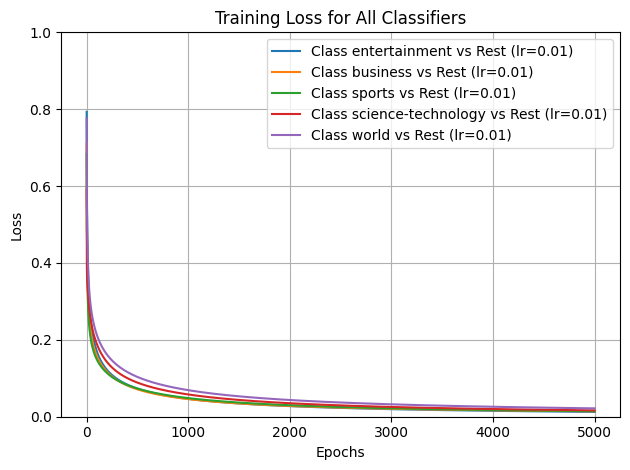


=== Final Training Results ===

Best Loss Values:
Class entertainment: 0.012577
Class business: 0.014102
Class sports: 0.014495
Class science-technology: 0.016517
Class world: 0.021740

Best Hyperparameters:
Class entertainment:
  Learning Rate: 0.01
  Epochs: 5000
Class business:
  Learning Rate: 0.01
  Epochs: 5000
Class sports:
  Learning Rate: 0.01
  Epochs: 5000
Class science-technology:
  Learning Rate: 0.01
  Epochs: 5000
Class world:
  Learning Rate: 0.01
  Epochs: 5000


In [85]:
for i in ["entertainment", "business", "sports", "science-technology", "world"]:
    loss_values = np.array(losses[i])
    epochs = np.arange(len(loss_values))
    plt.plot(epochs, 
             loss_values, 
             label=f'Class {i} vs Rest (lr={best_params[i]["learning_rate"]})')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for All Classifiers')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.tight_layout()
plt.show()


print("\n=== Final Training Results ===")
print("\nBest Loss Values:")
for i in ["entertainment", "business", "sports", "science-technology", "world"]:
    print(f"Class {i}: {best_losses[i]:.6f}")

print("\nBest Hyperparameters:")
for i in ["entertainment", "business", "sports", "science-technology", "world"]:
    print(f"Class {i}:")
    print(f"  Learning Rate: {best_params[i]['learning_rate']}")
    print(f"  Epochs: {best_params[i]['epochs']}")

In [86]:
results = {
    'Class': [],
    'Probs':[],
    'Accuracy': [],
    'F1 Score': [],
    'Confusion Matrix': []
}

for i in ["entertainment", "business", "sports", "science-technology", "world"]: 
    y_test_binary = (test_labels == i).astype(int)  
    predicted_class, probability = classifiers[i].predict(X_test_vectors) 
    accuracy = accuracy_score(y_test_binary, predicted_class)
    f1 = f1_score(y_test_binary, predicted_class)
    cm = confusion_matrix(y_test_binary, predicted_class)

    
    results['Class'].append(i)
    results['Probs'].append(probability)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)
    results['Confusion Matrix'].append(cm)

results_df = pd.DataFrame(results)
print(results_df)

                Class                                              Probs  \
0       entertainment  [7.117862694591398e-10, 0.00012423810438667063...   
1            business  [2.4291953032265544e-07, 8.606457074285783e-06...   
2              sports  [0.9999999977677563, 6.009465703170881e-06, 1....   
3  science-technology  [8.835705160229688e-13, 2.8482092067163395e-07...   
4               world  [6.175251586641359e-07, 0.9997389489198871, 2....   

   Accuracy  F1 Score     Confusion Matrix  
0  0.973154  0.928571  [[238, 0], [8, 52]]  
1  0.979866  0.954545  [[229, 1], [5, 63]]  
2  0.983221  0.954128  [[241, 0], [5, 52]]  
3  0.959732  0.875000  [[244, 3], [9, 42]]  
4  0.963087  0.905983  [[234, 2], [9, 53]]  


In [ ]:
class_mapping = {
    "entertainment": 0,
    "business": 1,
    "sports": 2,
    "science-technology": 3,
    "world": 4
}

encoded_test_labels = np.array([class_mapping[label] for label in test_labels])
print(encoded_test_labels)
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

probabilities = np.zeros((X_test_vectors.shape[0], 5))

for class_name, class_idx in class_mapping.items():
    _, prob = classifiers[class_name].predict(X_test_vectors)
    probabilities[:, class_idx] = prob  # Fill probabilities for the class

predicted_labels = np.argmax(probabilities, axis=1)

accuracy = accuracy_score(encoded_test_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(encoded_test_labels, predicted_labels)
print(f"Confusion Matrix:\n{conf_matrix}")

macro_f1 = f1_score(encoded_test_labels, predicted_labels, average='macro')
print(f"Macro F1 Score: {macro_f1:.4f}")


class_labels = list(class_mapping.keys())  
report = classification_report(encoded_test_labels, predicted_labels, target_names=class_labels)
print("\nClassification Report:\n")
print(report)


[2 4 1 3 1 0 0 4 1 1 2 2 1 1 1 2 0 1 3 0 2 0 4 1 1 2 1 3 2 2 3 3 3 4 2 0 2
 1 1 4 2 2 1 2 1 2 4 0 0 4 1 3 3 0 4 3 1 1 3 4 4 4 3 0 0 1 0 2 1 2 0 4 3 4
 3 0 4 2 0 0 1 0 2 1 2 2 0 1 3 2 1 1 2 2 4 4 2 0 0 2 0 1 1 0 1 3 4 4 4 4 1
 3 4 1 1 0 2 4 4 3 1 3 1 4 3 2 2 3 3 0 0 4 4 0 1 3 2 4 2 0 1 2 3 1 1 1 1 0
 4 2 1 3 0 0 0 3 0 1 1 4 4 2 4 3 1 1 1 4 2 4 4 1 0 1 3 0 4 4 4 3 1 3 3 1 0
 0 2 0 3 3 2 3 3 3 1 0 4 2 0 0 0 0 2 2 4 3 2 1 4 2 4 0 3 3 1 0 0 1 1 1 4 2
 4 3 0 1 3 0 1 4 0 1 2 1 4 3 1 2 3 4 1 3 4 4 0 3 3 2 4 0 1 0 0 3 2 3 2 4 4
 0 2 4 4 4 0 2 2 4 0 0 1 3 4 2 0 4 4 3 1 2 1 1 4 0 1 2 3 2 2 1 2 3 0 2 0 4
 4 4]
Accuracy: 0.9463
Confusion Matrix:
[[57  0  1  1  1]
 [ 0 65  0  3  0]
 [ 0  0 56  0  1]
 [ 0  4  0 45  2]
 [ 0  2  0  1 59]]
Macro F1 Score: 0.9454

Classification Report:

                    precision    recall  f1-score   support

     entertainment       1.00      0.95      0.97        60
          business       0.92      0.96      0.94        68
            sports       0.98      0.98

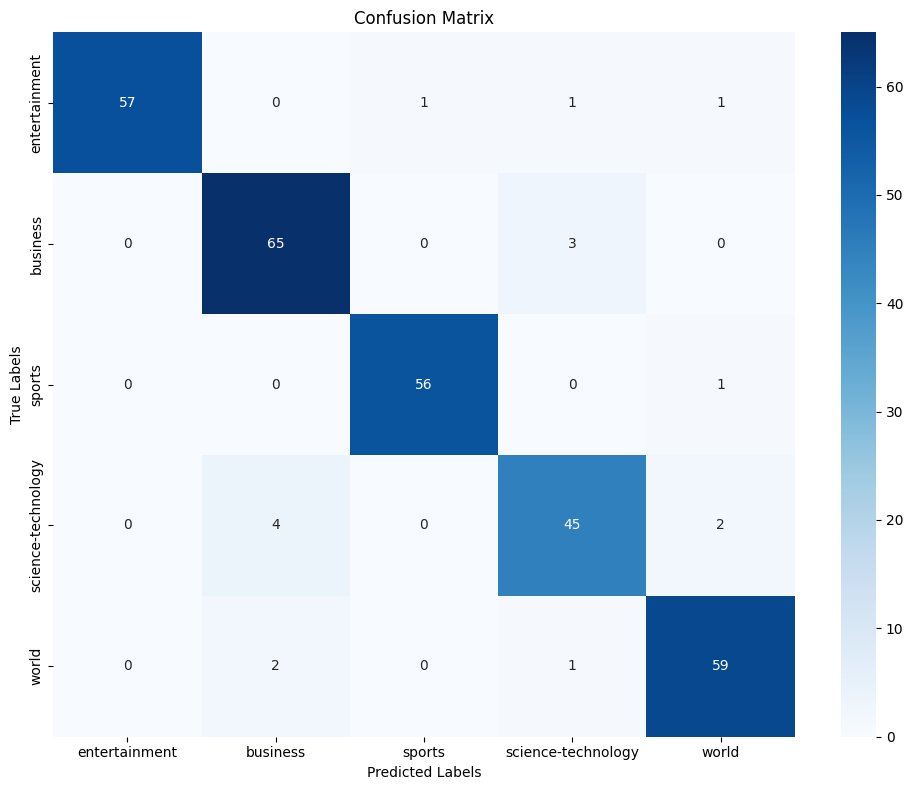

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()

plt.show()


In [91]:
print("Numeric labels:", numeric_labels)
print("Original classes:", label_encoder.classes_)


Numeric labels: [3 4 0 2 0 1 1 4 0 0 3 3 0 0 0 3 1 0 2 1 3 1 4 0 0 3 0 2 3 3 2 2 2 4 3 1 3
 0 0 4 3 3 0 3 0 3 4 1 1 4 0 2 2 1 4 2 0 0 2 4 4 4 2 1 1 0 1 3 0 3 1 4 2 4
 2 1 4 3 1 1 0 1 3 0 3 3 1 0 2 3 0 0 3 3 4 4 3 1 1 3 1 0 0 1 0 2 4 4 4 4 0
 2 4 0 0 1 3 4 4 2 0 2 0 4 2 3 3 2 2 1 1 4 4 1 0 2 3 4 3 1 0 3 2 0 0 0 0 1
 4 3 0 2 1 1 1 2 1 0 0 4 4 3 4 2 0 0 0 4 3 4 4 0 1 0 2 1 4 4 4 2 0 2 2 0 1
 1 3 1 2 2 3 2 2 2 0 1 4 3 1 1 1 1 3 3 4 2 3 0 4 3 4 1 2 2 0 1 1 0 0 0 4 3
 4 2 1 0 2 1 0 4 1 0 3 0 4 2 0 3 2 4 0 2 4 4 1 2 2 3 4 1 0 1 1 2 3 2 3 4 4
 1 3 4 4 4 1 3 3 4 1 1 0 2 4 3 1 4 4 2 0 3 0 0 4 1 0 3 2 3 3 0 3 2 1 3 1 4
 4 4]
Original classes: ['business' 'entertainment' 'science-technology' 'sports' 'world']
